<a href="https://colab.research.google.com/github/EilieYoun/Narnia-Edu/blob/main/Lecture/240813_snu/03_3D_Field_Predict_%ED%95%B4%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서울대 예측 AI 실습 : 3D Field Predict


* 날짜:
* 이름:


## 학습내용
```
- 3D 데이터셋에 대해 이해하고 적절한 DataLoader를 구성 한다.
- 3D Field 예측 문제에 적합한 모델을 구성하고, 학습을 진행한다.
```

## **(0) 환경세팅**
---

### **| 라이브러리 설치**

In [ ]:
!pip install pytorch-lightning

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!pip install torchio monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 10.4 MB/s eta 0:00:00


### **| 데이터 압축 풀기**

In [ ]:
!gdown --folder  https://drive.google.com/drive/u/0/folders/1E5OP-VCqgh8wEaQO-jXdvRH3dQZtI_Vp

Retrieving folder contents
Processing file 1_9JwoUtFn3RKU9pwSl8QD3WG1QTPpN3N bracket_field.zip
Processing file 1_LLVZLkg91UFD9Ac9Mjl6pKIwY86lfW7 carfield.zip
Processing file 1eo8MMnvyZygA18XFMeOByyTjr1zWS78t carhood_annot.csv
Processing file 19iZmMsK79VHiDCzDFbWMMlj-GR9jeqc- carhood_npy.zip
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1_9JwoUtFn3RKU9pwSl8QD3WG1QTPpN3N
From (redirected): https://drive.google.com/uc?id=1_9JwoUtFn3RKU9pwSl8QD3WG1QTPpN3N&confirm=t&uuid=57f939a1-1e72-4fd2-8c80-704529da4016
To: /content/데이터/bracket_field.zip
100% 35.8M/35.8M [00:01<00:00, 31.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_LLVZLkg91UFD9Ac9Mjl6pKIwY86lfW7
From (redirected): https://drive.google.com/uc?id=1_LLVZLkg91UFD9Ac9Mjl6pKIwY86lfW7&confirm=t&uuid=59e0b6db-f828-4800-87e6-9e71692b2eef
To: /content/데이터/carfield.zip
100% 41.4M/41.4M [00:01<0

In [ ]:
!unzip /content/데이터/bracket_field.zip -d ./bracket_field

Archive:  /content/데이터/bracket_field.zip
  inflating: ./bracket_field/506_194.npy  
  inflating: ./bracket_field/424_245.npy  
  inflating: ./bracket_field/20_249.npy  
  inflating: ./bracket_field/427_170.npy  
  inflating: ./bracket_field/72_142.npy  
  inflating: ./bracket_field/512_623.npy  
  inflating: ./bracket_field/289_15.npy  
  inflating: ./bracket_field/211_114.npy  
  inflating: ./bracket_field/10_30.npy  
  inflating: ./bracket_field/460_207.npy  
  inflating: ./bracket_field/484_153.npy  
  inflating: ./bracket_field/59_122.npy  
  inflating: ./bracket_field/616_114.npy  
  inflating: ./bracket_field/416_282.npy  
  inflating: ./bracket_field/86_187.npy  
  inflating: ./bracket_field/28_101.npy  
  inflating: ./bracket_field/428_113.npy  
  inflating: ./bracket_field/295_220.npy  
  inflating: ./bracket_field/238_183.npy  
  inflating: ./bracket_field/586_183.npy  
  inflating: ./bracket_field/562_30.npy  
  inflating: ./bracket_field/447_146.npy  
  inflating: ./brac

### **| Utils**

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


def plot_voxel(voxel_grid):
    fig = plt.figure(figsize=(5, 5))

    ax1 = fig.add_subplot(111, projection='3d')
    ax1.voxels(voxel_grid, edgecolor='k')
    ax1.set_title('Voxel visualization')

    plt.show()
    plt.close()

def plot_voxel_grid(grid, mask, alpha=0.7):
    grid_shape = grid.shape

    colors = plt.cm.rainbow(grid)
    colors[..., 3] = alpha  # alpha 채널 추가

    fig = plt.figure(figsize=(18, 6))

    ax1 = fig.add_subplot(111, projection='3d')
    ax1.voxels(mask, facecolors=colors, edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    cb1 = fig.colorbar(plt.cm.ScalarMappable(cmap='rainbow', norm=plt.Normalize(vmin=0, vmax=1.1)), ax=ax1, shrink=0.5)
    cb1.set_label('Value')

    plt.show()
    plt.close()

# 3차원데이터의 위에서 본 모습만 2d plot으로 그리기 -> 굉장히 빠르게 시각화 진행가능
def plot_topview(xs, alpha=0.8, save_path=None, rows=1, mn=None, mx=None):
    n = len(xs)
    cols = (n + rows - 1) // rows  # Calculate the number of columns needed

    fig, axs = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
    axs = np.array(axs).reshape(rows, cols)  # Ensure axs is a 2D array

    for i, (ax, x) in enumerate(zip(axs.flatten(), xs)):
        top_view = np.max(x, axis=2)[::-1]

        cax1 = ax.imshow(top_view, cmap='rainbow', alpha=alpha, origin='lower', vmin=mn, vmax=mx)
        cb1 = fig.colorbar(cax1, ax=ax, shrink=0.75)
        cb1.set_label('Value')

    for ax in axs.flatten()[n:]:
        ax.axis('off')  # Turn off axes for any extra subplots

    if save_path is not None:
        plt.savefig(save_path)
    else:
        plt.show()

    plt.close()

## **(1) Dataset**

### **| EDA**

**데이터 소개**

`3D Deep Learning-based Synthetic Jet Engine Bracket Dataset(DeepJEB)` 은 나니아랩스의 생성형 AI 기술을 바탕으로 전세계 연구자들이 연구에 활용할 수 있도록 공개한 벤치마크 데이터셋입니다. 본 데이터셋은 2013년 “GE 제트 엔진 브라켓 챌린지”에 출품된 CAD 데이터를 모아 해석한 SimJEB의 데이터들을 활용하였습니다. 381개 가량의 SimJEB 데이터를 학습해 데이터셋의 크기를 2138개로 늘렸으며, 데이터 클리닝 과정을 거쳐 동일한 구속조건의 데이터셋을 구축하였습니다. DeepJEB은 Surface mesh, Volume mesh 등 형상 데이터를 비롯하여 정교한 해석을 통해 획득한 여러 스칼라, 필드 데이터등 CAE 연구자들이 필요로 하는 모든 종류의 데이터들을 제공하고 있습니다.

 이번 시간에는 `DeepJEB`의 STL 데이터를 활용한 3D to field 예측 모델 학습을 수행합니다. 형상 정보가 모델의 입력값으로 들어가며, 인공지능 모델이 형상을 학습할 수 있도록 형상 정보를 32x32x32 해상도의 그리드 형태 SDF로 변환하였습니다. 출력값으로는 각 지점의 변위값(displacement)을 선정하였습니다.  변위는 구조의 안정성을 평가하는데 활용되며, 실제 실험을 통해 측정을 할 수 있기 때문에 실제 결과와 비교하는데 유용한 라벨 정보입니다.

데이터셋 링크: https://www.narnia.ai/dataset

논문 링크: https://arxiv.org/abs/2406.09047

In [ ]:
import glob

paths = sorted(glob.glob('./bracket_field/*.npy'))
print(len(paths))

519


**데이터 시각화**

data shape:  (32, 32, 32)


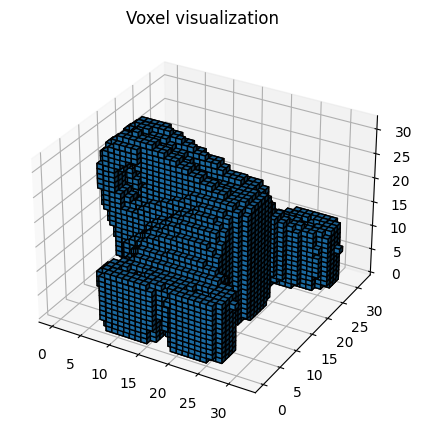

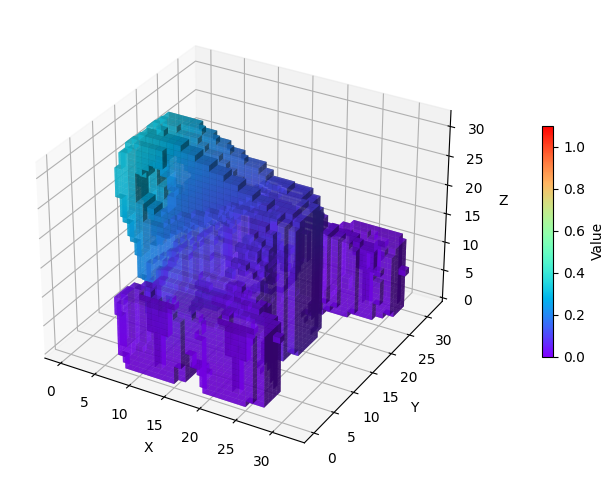

In [ ]:
idx = 32
data = np.load(paths[idx])
print('data shape: ', data.shape)

plot_voxel(data) # 0 또는 1로만 되어있는거 처럼 보이지만 실제로는 그렇지 않다.

# plot_voxel_grid: 모든 값을 값에 따라 다른 색깔로 표현
plot_voxel_grid(data, data!=0) # data가 0이 아닌 영역만 그리기

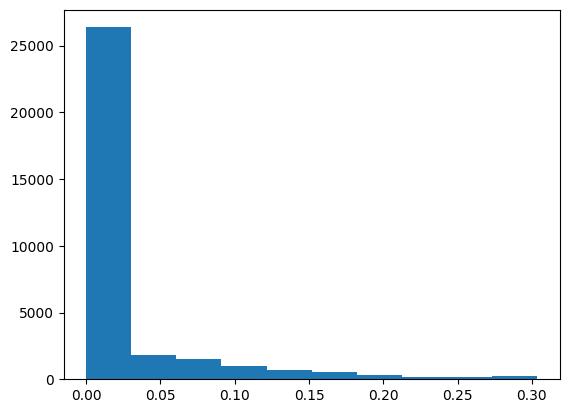

In [ ]:
_=plt.hist(data.flatten()) # 0인 부분은 빈공간, 그외 부분은 0 ~ 1.09~ 정도의 변위값을 지니고 있다.

### **| DataLoader**

간략하게 데이터 구성을 확인했으니 이를 적절한 `DataLoader` 클래스를 구축하겠습니다. `DataLoader`는 아래와 같은 기능이 포함되어야 합니다.

```
- __init__ : 데이터셋 초기화.
    - field_paths :
    - batch_size: 8
    - shuffle: True
    - dtype: torch.float32
    - dtype: 데이터 유형 (torch.float32 기본값).

- __len__ : 데이터셋의 전체 길이를 반환.

- __getitem__ : 인덱스에 해당하는 데이터 항목을 반환.
    - DataFrame을 로드하여 필요한 데이터 불러오기
    - 성능 변수를 적절하게 정규화
    - 전처리된 인풋 텐서 (x)와 타깃 텐서 (y) 반환
    
- get_loader : 데이터 로더를 반환.

- get_batch : 지정된 인덱스의 배치를 반환.
```


In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader


class BracketFieldProcess(Dataset):

  def __init__(self,
               field_paths,
               batch_size=8,
               shuffle=True,
               dtype=torch.float32
               ):

    self.field_paths = field_paths
    self.batch_size = batch_size
    self.shuffle = shuffle
    self.dtype = dtype

  def __len__(self):
    return len(self.field_paths)

  def __getitem__(self, idx):
    field_path = self.field_paths[idx]
    field = np.load(field_path) # 32,32,32
    voxel = np.where(field==0, 0, 1) # 32,32,32

    mask = (field!=0)  # bkg아닌 변위 값이 존재하는 곳
    field[mask] = np.log(field[mask]) * -1. / 10. # 변위 값을 log 변형

    voxel = torch.from_numpy(voxel).type(self.dtype).unsqueeze(0) # 1, 32, 32, 32
    field = torch.from_numpy(field).type(self.dtype).unsqueeze(0) # 1, 32, 32, 32

    return voxel, field



  def get_loader(self):
    loader = DataLoader(self, batch_size=self.batch_size, shuffle=self.shuffle, pin_memory=True)
    return loader

  def get_batch(self, idx=0):
    ds = self.get_loader()
    for i, batch in enumerate(ds):
        if i == idx : break
    return batch

**데이터 분할**

In [ ]:
from sklearn.model_selection import train_test_split

train_paths, test_paths = train_test_split(paths, test_size=0.1, random_state=42)
print(len(paths), len(train_paths), len(test_paths))

519 467 52


**Processor 구축**

In [ ]:
bsz = 8
train_pp = BracketFieldProcess(train_paths, batch_size=bsz, shuffle=True)
test_pp = BracketFieldProcess(train_paths, batch_size=bsz, shuffle=False)

**Batch 데이터 확인**

- Train batch shape:  torch.Size([8, 1, 32, 32, 32]) torch.Size([8, 1, 32, 32, 32])


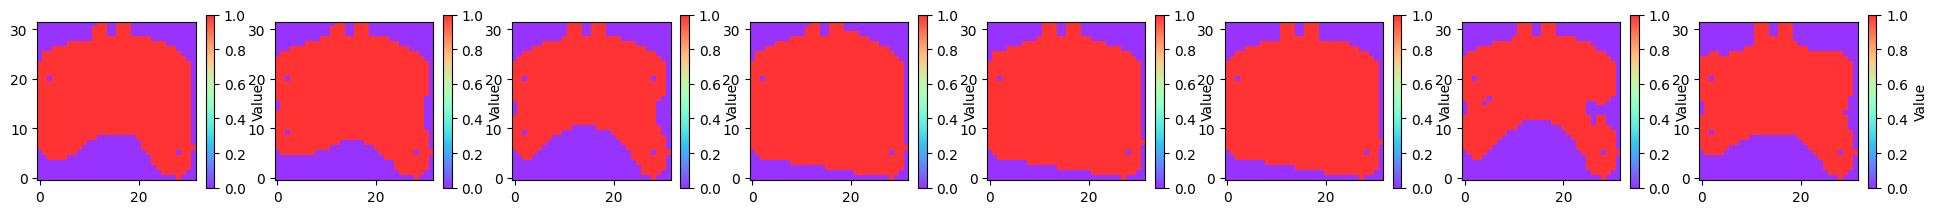

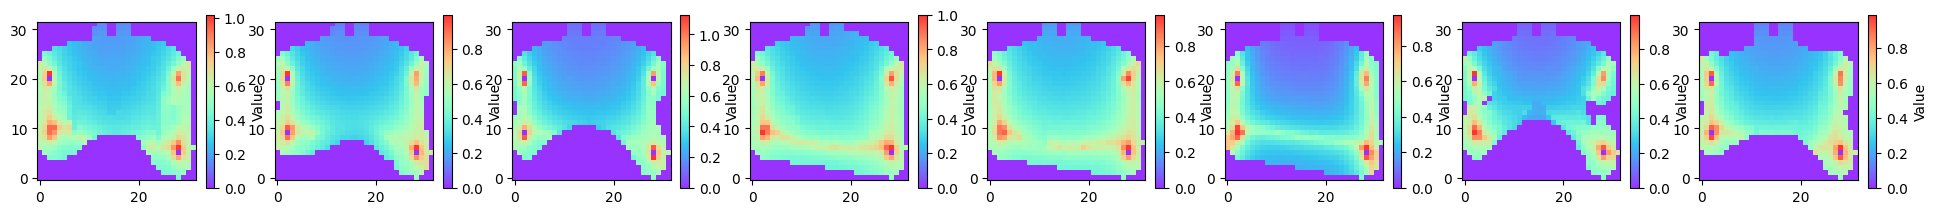

- Test batch shape:  torch.Size([8, 1, 32, 32, 32]) torch.Size([8, 1, 32, 32, 32])


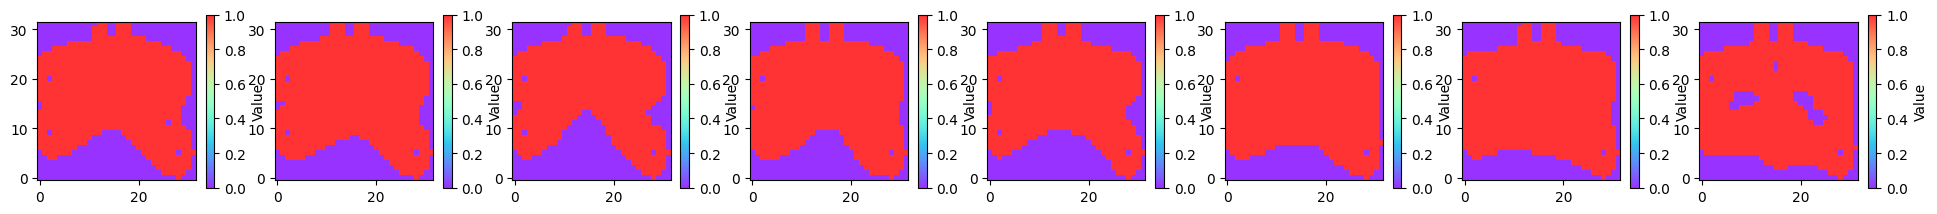

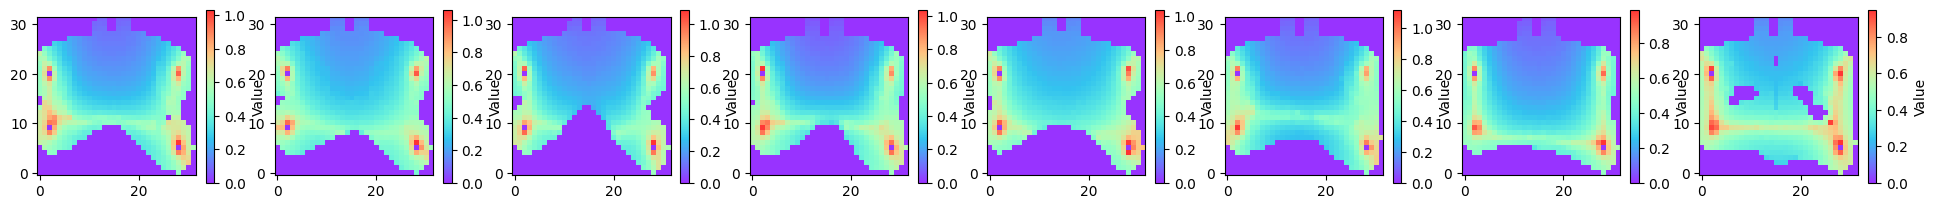

In [ ]:
train_xs, train_ys = train_pp.get_batch(0)
print('- Train batch shape: ', train_xs.shape, train_ys.shape)
plot_topview(train_xs[:,0].numpy()) # n, 32, 32, 32 numpy array
plot_topview(train_ys[:,0].numpy())

test_xs, test_ys = test_pp.get_batch(0)
print('- Test batch shape: ', test_xs.shape, test_ys.shape)
plot_topview(test_xs[:,0].numpy())
plot_topview(test_ys[:,0].numpy())

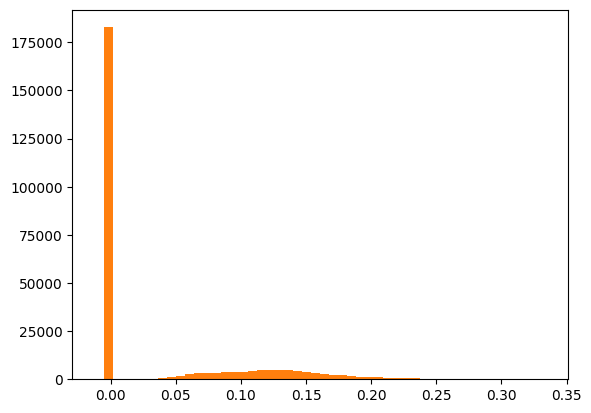

In [ ]:
y  = train_ys.numpy().flatten()
mask = (y!=0)  # bkg아닌 변위 값이 존재하는 곳

y[mask] = np.log(y[mask]) * -1. / 10.
_=plt.hist(y[mask], bins=50)
_=plt.hist(y, bins=50)


## **(2) 모델**
---

* 이미지 출처 : (https://github.com/AghdamAmir/3D-UNet)

<img src="https://github.com/AghdamAmir/3D-UNet/raw/main/3D-UNET.png" alt="UNet" width="700"/>

이번 시간에는 `monai.networks.nets` 의 `UNet` 이용해 `3D Unet`을 구축하겠습니다. 이 모델은 1, 32, 32, 32 인풋을 받아 다시 1, 32, 32, 32 크기의 아웃풋을 내놓는 모델이 됩니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from monai.networks.nets import UNet

class UNet3D(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNet3D, self).__init__()
        self.unet = UNet(
            spatial_dims = 3,
            in_channels = in_channels,
            out_channels = out_channels,
            channels = (16, 32, 64, 128, 256),
            strides = (2,2,2,2),
            num_res_units = 2,
        )

    def forward(self, x):
        return self.unet(x)

In [ ]:
# 모델 구조 생성
structure = UNet3D()

# 모델구조 테스트
# 입력 데이터
inputs = torch.randn(1, 1, 32, 32, 32) # (n, 1, 32, 32, 32)
outputs = structure(inputs)
print(outputs.shape)

torch.Size([1, 1, 32, 32, 32])


### **| 모델 구축**

`PyTorch Lightning`을 사용하여 훈련, 검증, 최적화 루틴을 포함하는 `BracketFieldPredictor`를 정의합니다.

```
- __init__ : 예측 모델(predictor)을 초기화합니다.
- forward : 입력 데이터를 예측 모델에 전달하여 출력을 반환합니다.
- configure_optimizers : Adam 옵티마이저와 코사인 조정 학습률 스케줄러를 설정합니다.
- training_step : 훈련 배치에서 입력 데이터와 타깃을 받아 모델 출력을 계산하고, MSE 손실을 계산하여 로깅합니다.
- validation_step : 검증 배치에서 입력 데이터와 타깃을 받아 모델 출력을 계산하고, MSE 손실을 계산하여 로깅합니다.
- fit : 훈련 및 검증 데이터를 사용하여 모델을 훈련합니다. 조기 종료와 체크포인트 저장 기능을 포함합니다.
- test_step : 테스트 배치에서 입력 데이터와 타깃을 받아 모델 출력을 계산하고, R² 점수와 MAE를 포함한 성능 지표를 로깅합니다.
- test : 테스트 데이터를 사용하여 모델 성능을 평가합니다.
- infer : 주어진 데이터 로더에서 예측을 수행하고, 필요 시 스케일러를 사용하여 예측값을 역변환합니다.
```

In [ ]:
import torch.nn as nn
import torch
from torch.optim.lr_scheduler import CosineAnnealingLR

import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint
from pytorch_lightning.loggers import  CSVLogger

from sklearn.metrics import r2_score, mean_absolute_error



class BracketFieldPredictor(pl.LightningModule):
    def __init__(self, structure, *args, **kwargs):
        super().__init__()
        self.structure = structure

    def forward(self, x):
        x = self.structure(x)
        return x

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.init_lr)
        scheduler = CosineAnnealingLR(optimizer, T_max=self.epochs)
        return [optimizer], [{"scheduler": scheduler, "interval": "epoch"}]

    def training_step(self, batch, batch_idx):
        data, target = batch
        output = self(data)
        loss = nn.MSELoss()(output, target)
        lr = self.optimizers().param_groups[0]['lr']

        self.log('train_loss', loss)
        self.log('learning_rate', lr, prog_bar=True, logger=True)
        return loss

    def validation_step(self, batch, batch_idx):
        data, target = batch
        output = self(data)
        loss =  nn.MSELoss()(output, target)
        lr = self.optimizers().param_groups[0]['lr']

        self.log('valid_loss', loss)
        return loss

    def fit(self, train_loader, save_dir,  valid_loader=None, init_lr=1e-3, epochs=10, patience=5, infer_ds=None):
        self.init_lr = init_lr
        self.epochs = epochs
        self.infer_ds = infer_ds
        self.save_dir = save_dir

        # valid loss 기준으로 최적 모델 저장하기
        if valid_loader is not None:
            monitor = 'valid_loss'
        else:
            monitor = 'train_loss'

        checkpoint_callback = ModelCheckpoint(
            dirpath=save_dir,
            filename='ckp_model',
            save_top_k=1,
            verbose=True,
            monitor=monitor,
            mode='min'
        )

        # log
        csv_logger = CSVLogger(save_dir, name="csv_logs")

        # train
        self.trainer = Trainer(
            accelerator='cuda',
            max_epochs=epochs,
            default_root_dir=save_dir,
            callbacks=[checkpoint_callback],
            logger=[csv_logger],
            log_every_n_steps=len(train_loader)
        )

        self.trainer.fit(self, train_dataloaders=train_loader, val_dataloaders=valid_loader)


    def test_step(self, batch, batch_idx):
        data, target = batch
        output = self(data)
        loss = nn.MSELoss()(output, target)
        self.log('test_loss', loss)

    def test(self, data_loader, device='cuda'):
        self.trainer = Trainer(
            accelerator=device,
        )
        results = self.trainer.test(self, dataloaders=data_loader)
        return results

    def on_train_epoch_end(self): # lightning 모듈에서 이미 정의되어있는 함수. (1epoch 끝날때마다 자동 실행)
        # 모델이 잘 학습되고 있는지 시각화를 해보자

        # inference 에 필요한 데이터
        if self.infer_ds is not None:
          imgs  = []
          xs, ys = self.infer_ds
          preds = self(xs.cuda())

          # numpy 로 변경, 차원 변경(n, 1, 32, 32, 32) -> (n, 32, 32, 32)
          xs = xs.numpy()[:,0]
          ys = ys.numpy()[:,0]
          preds = preds.detach().cpu().numpy()[:,0]

          imgs.extend(xs)
          imgs.extend(ys)
          imgs.extend(preds)
          # imgs = [x1, x2, x3, ... y1, y2, y3 ... pred1, pred2, ...]

          epoch = self.trainer.current_epoch
          plot_topview(
              np.array(imgs),
              save_path = f'{self.save_dir}/sample_e{epoch:05d}.png',
              rows=3, # 이미지 3줄로 출력
          )

### | **학습 및 평가**

**모델 인스턴스**

In [ ]:
model = BracketFieldPredictor(structure=structure)

**학습**

In [ ]:
train_loader = train_pp.get_loader()
test_loader = test_pp.get_loader()
test_xs, test_ys = test_pp.get_batch(0)
model.fit(train_loader, save_dir='unet3d_1', valid_loader = test_loader, epochs=30, infer_ds = [test_xs, test_ys], init_lr=1e-3)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/unet3d_1 exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type   | Params | Mode 
---------------------------------------------
0 | structure | UNet3D | 4.8 M  | train
---------------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.222    Total estimated model params size (MB)
145       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 0, global step 59: 'valid_loss' reached 0.02594 (best 0.02594), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 1, global step 118: 'valid_loss' reached 0.00718 (best 0.00718), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 2, global step 177: 'valid_loss' reached 0.00474 (best 0.00474), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 3, global step 236: 'valid_loss' reached 0.00391 (best 0.00391), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 4, global step 295: 'valid_loss' reached 0.00316 (best 0.00316), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 5, global step 354: 'valid_loss' reached 0.00271 (best 0.00271), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 6, global step 413: 'valid_loss' reached 0.00242 (best 0.00242), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 7, global step 472: 'valid_loss' reached 0.00222 (best 0.00222), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 8, global step 531: 'valid_loss' reached 0.00197 (best 0.00197), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 9, global step 590: 'valid_loss' reached 0.00185 (best 0.00185), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 10, global step 649: 'valid_loss' reached 0.00166 (best 0.00166), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 11, global step 708: 'valid_loss' reached 0.00156 (best 0.00156), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 12, global step 767: 'valid_loss' reached 0.00145 (best 0.00145), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 13, global step 826: 'valid_loss' reached 0.00139 (best 0.00139), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 14, global step 885: 'valid_loss' reached 0.00131 (best 0.00131), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 15, global step 944: 'valid_loss' reached 0.00129 (best 0.00129), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 16, global step 1003: 'valid_loss' reached 0.00118 (best 0.00118), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 17, global step 1062: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 18, global step 1121: 'valid_loss' reached 0.00108 (best 0.00108), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 19, global step 1180: 'valid_loss' reached 0.00103 (best 0.00103), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 20, global step 1239: 'valid_loss' reached 0.00099 (best 0.00099), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 21, global step 1298: 'valid_loss' reached 0.00096 (best 0.00096), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 22, global step 1357: 'valid_loss' reached 0.00092 (best 0.00092), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 23, global step 1416: 'valid_loss' reached 0.00088 (best 0.00088), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 24, global step 1475: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 25, global step 1534: 'valid_loss' reached 0.00085 (best 0.00085), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 26, global step 1593: 'valid_loss' reached 0.00080 (best 0.00080), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 27, global step 1652: 'valid_loss' reached 0.00080 (best 0.00080), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 28, global step 1711: 'valid_loss' reached 0.00077 (best 0.00077), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 29, global step 1770: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 30, global step 1829: 'valid_loss' reached 0.00072 (best 0.00072), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 31, global step 1888: 'valid_loss' reached 0.00071 (best 0.00071), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 32, global step 1947: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 33, global step 2006: 'valid_loss' reached 0.00066 (best 0.00066), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 34, global step 2065: 'valid_loss' reached 0.00065 (best 0.00065), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 35, global step 2124: 'valid_loss' reached 0.00064 (best 0.00064), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 36, global step 2183: 'valid_loss' reached 0.00062 (best 0.00062), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 37, global step 2242: 'valid_loss' reached 0.00061 (best 0.00061), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 38, global step 2301: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 39, global step 2360: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 40, global step 2419: 'valid_loss' reached 0.00059 (best 0.00059), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 41, global step 2478: 'valid_loss' reached 0.00056 (best 0.00056), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 42, global step 2537: 'valid_loss' reached 0.00055 (best 0.00055), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 43, global step 2596: 'valid_loss' reached 0.00054 (best 0.00054), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 44, global step 2655: 'valid_loss' reached 0.00054 (best 0.00054), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 45, global step 2714: 'valid_loss' reached 0.00053 (best 0.00053), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 46, global step 2773: 'valid_loss' reached 0.00053 (best 0.00053), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 47, global step 2832: 'valid_loss' reached 0.00053 (best 0.00053), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 48, global step 2891: 'valid_loss' reached 0.00052 (best 0.00052), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 49, global step 2950: 'valid_loss' reached 0.00050 (best 0.00050), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 50, global step 3009: 'valid_loss' reached 0.00049 (best 0.00049), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 51, global step 3068: 'valid_loss' reached 0.00048 (best 0.00048), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 52, global step 3127: 'valid_loss' reached 0.00048 (best 0.00048), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 53, global step 3186: 'valid_loss' reached 0.00047 (best 0.00047), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 54, global step 3245: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 55, global step 3304: 'valid_loss' reached 0.00047 (best 0.00047), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 56, global step 3363: 'valid_loss' reached 0.00046 (best 0.00046), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 57, global step 3422: 'valid_loss' reached 0.00045 (best 0.00045), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 58, global step 3481: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 59, global step 3540: 'valid_loss' reached 0.00045 (best 0.00045), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 60, global step 3599: 'valid_loss' reached 0.00044 (best 0.00044), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 61, global step 3658: 'valid_loss' was not in top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 62, global step 3717: 'valid_loss' reached 0.00043 (best 0.00043), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 63, global step 3776: 'valid_loss' reached 0.00043 (best 0.00043), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 64, global step 3835: 'valid_loss' reached 0.00042 (best 0.00042), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 65, global step 3894: 'valid_loss' reached 0.00042 (best 0.00042), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 66, global step 3953: 'valid_loss' reached 0.00042 (best 0.00042), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 67, global step 4012: 'valid_loss' reached 0.00041 (best 0.00041), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 68, global step 4071: 'valid_loss' reached 0.00041 (best 0.00041), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 69, global step 4130: 'valid_loss' reached 0.00041 (best 0.00041), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 70, global step 4189: 'valid_loss' reached 0.00040 (best 0.00040), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 71, global step 4248: 'valid_loss' reached 0.00040 (best 0.00040), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 72, global step 4307: 'valid_loss' reached 0.00040 (best 0.00040), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 73, global step 4366: 'valid_loss' reached 0.00039 (best 0.00039), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 74, global step 4425: 'valid_loss' reached 0.00039 (best 0.00039), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 75, global step 4484: 'valid_loss' reached 0.00039 (best 0.00039), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 76, global step 4543: 'valid_loss' reached 0.00039 (best 0.00039), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 77, global step 4602: 'valid_loss' reached 0.00039 (best 0.00039), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 78, global step 4661: 'valid_loss' reached 0.00039 (best 0.00039), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 79, global step 4720: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 80, global step 4779: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 81, global step 4838: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 82, global step 4897: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 83, global step 4956: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 84, global step 5015: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 85, global step 5074: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 86, global step 5133: 'valid_loss' reached 0.00038 (best 0.00038), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 87, global step 5192: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 88, global step 5251: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 89, global step 5310: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 90, global step 5369: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 91, global step 5428: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 92, global step 5487: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 93, global step 5546: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 94, global step 5605: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 95, global step 5664: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 96, global step 5723: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 97, global step 5782: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 98, global step 5841: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:Epoch 99, global step 5900: 'valid_loss' reached 0.00037 (best 0.00037), saving model to '/content/unet3d_1/ckp_model.ckpt' as top 1
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


**테스트**

In [ ]:
model = BracketFieldPredictor.load_from_checkpoint('./unet3d_1/ckp_model.ckpt', structure=structure)
model.test(test_loader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │  0.00037132942816242576   │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.00037132942816242576}]

**결과 시각화**

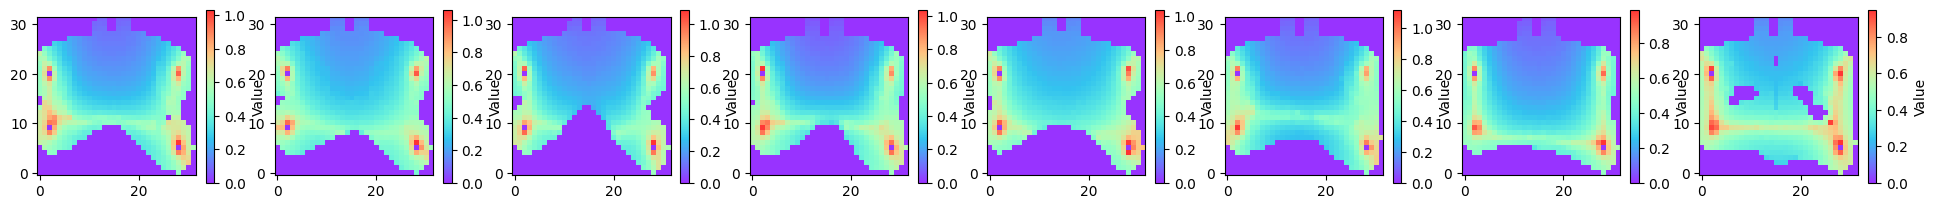

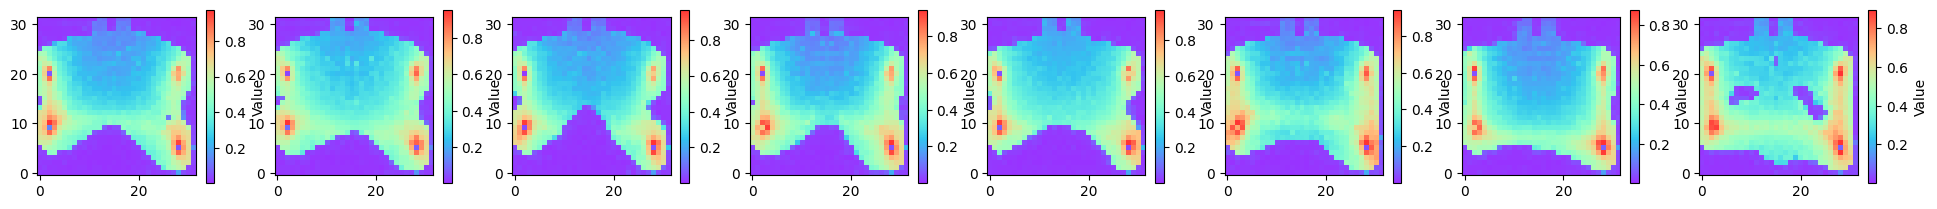

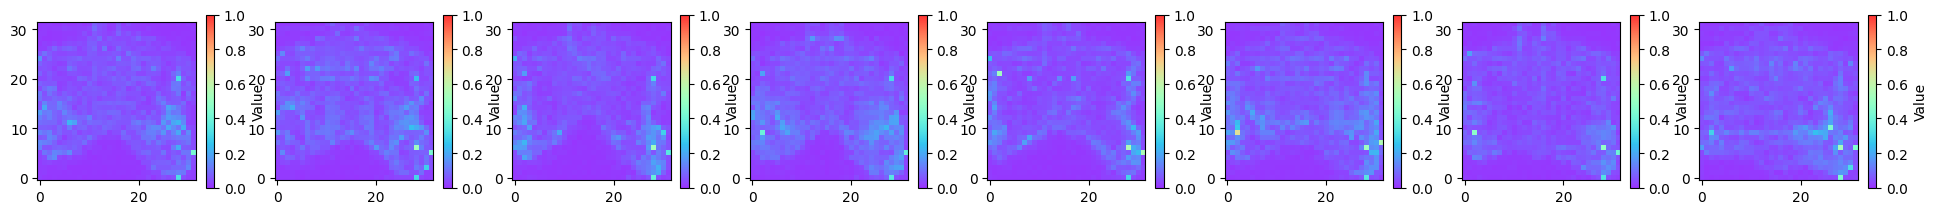

In [ ]:
preds = model(test_xs)
preds = preds.detach().cpu().numpy()[:,0]
reals = test_ys.numpy()[:,0]
diffs = np.abs(reals - preds)

plot_topview(reals)
plot_topview(preds)
plot_topview(diffs, mn=0, mx=1)

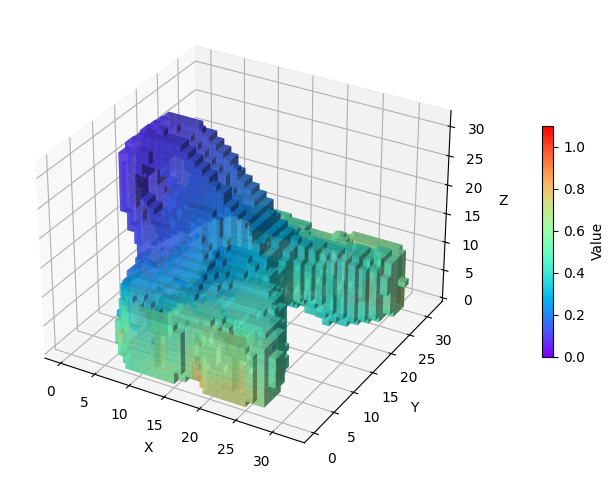

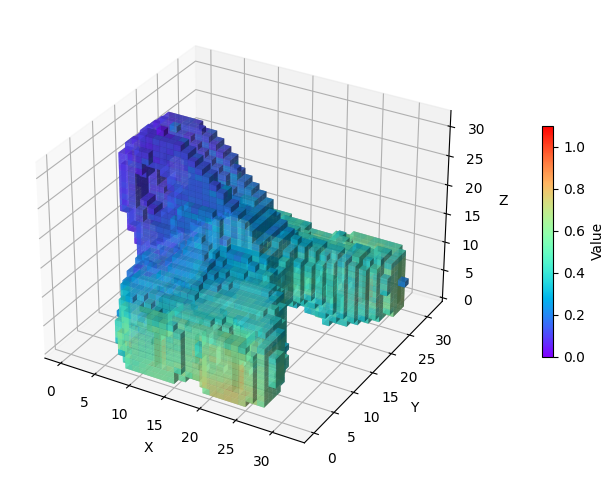

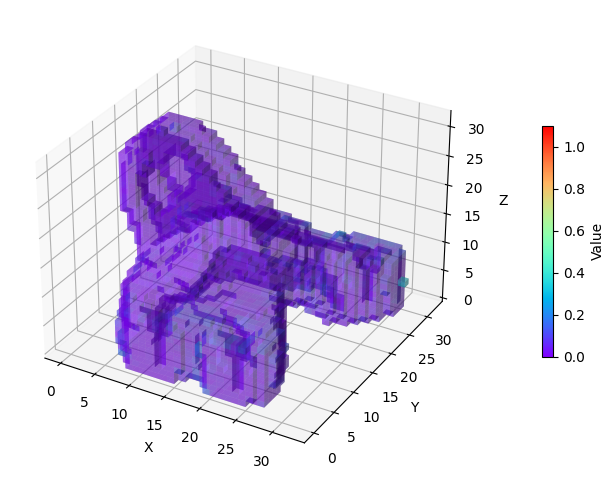

In [ ]:
idx = 0
plot_voxel_grid(reals[idx], reals[idx]!=0)
plot_voxel_grid(preds[idx], reals[idx]!=0) # 모델이 예측한 preds 의 배경은 preds 값 기준이 아닌 인풋 데이터 기준으로 배경을 설정
plot_voxel_grid(diffs[idx], reals[idx]!=0, alpha=0.4)